### *배달 주문건수*
#### - 250개 시군구 기준으로 날씨를 정리함
> 1. 

### - 원천 데이터 리스트
>  - 업종-지역별 평균주문금액.csv ()
>  - 업종-지역별 배달주문건수.csv ()

### 1. 2개의 업종 지역별 배달주문건수 & 평균주문금액을 loading하여 결합

#### 1.1 

In [6]:
# pyspark 필요 없듬 파일 작아서
# OrderCnt = spark\
#           .read\
#           .option("inferSchema", "true")\
#           .option("header", "false")\
#           .csv("data/업종-지역별배달주문건수.csv")

# OrderCnt = OrderCnt.toDF("date", "product", "sigu", "sigungu", "ordercnt")

# OrderAmt = spark\
#           .read\
#           .option("inferSchema", "true")\
#           .option("header", "false")\
#           .csv("data/업종-지역별평균주문금액.csv")
# OrderAmt = OrderAmt.toDF("date", "product", "sigu", "sigungu", "orderamt")


# print(OrderCnt.count())
# OrderCnt.describe().show()
# OrderCnt.show(2)

# print(OrderAmt.count())
# OrderAmt.describe().show()
# OrderAmt.show(2)

# OrderCnt = 197192 (2019-07-18 ~ 2020-08-31)
# OrderAmt = 191306 (2019-07-18 ~ 2020-08-31)

In [3]:
import pandas as pd

OrderCnt = pd.read_csv("data/업종-지역별배달주문건수.csv", header=None)
OrderCnt.columns = ["date", "product", "sigu", "sigungu", "ordercnt"]

OrderAmt = pd.read_csv("data/업종-지역별평균주문금액.csv", header=None)
OrderAmt.columns = ["date", "product", "sigu", "sigungu", "orderamt"]

OrderCnt.info()
OrderAmt.info()
# OrderCnt = 197192 (2019-07-18 ~ 2020-08-31)
# OrderAmt = 191306 (2019-07-18 ~ 2020-08-31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197192 entries, 0 to 197191
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      197192 non-null  object
 1   product   197192 non-null  object
 2   sigu      197192 non-null  object
 3   sigungu   197192 non-null  object
 4   ordercnt  197192 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191306 entries, 0 to 191305
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      191306 non-null  object
 1   product   191306 non-null  object
 2   sigu      191306 non-null  object
 3   sigungu   191306 non-null  object
 4   orderamt  191306 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.3+ MB


In [8]:
print(OrderCnt.head(2))
print(OrderAmt.head(2))
# OrderCnt = 197192 (2019-07-18 ~ 2020-08-31)
# OrderAmt = 191306 (2019-07-18 ~ 2020-08-31)

         date product sigu   sigungu  ordercnt
0  2019-07-18     도시락  경기도  고양시 일산동구        35
1  2019-07-18     도시락  경기도  고양시 일산서구        19
         date product sigu   sigungu  orderamt
0  2019-07-18     도시락  경기도  고양시 일산동구     35909
1  2019-07-18     도시락  경기도  고양시 일산서구     29513


#### 1.2 concat

In [9]:
Order_df = pd.merge(OrderCnt , OrderAmt, how='outer', on=['date', 'product', 'sigu', 'sigungu'])
print(Order_df.count())
# 197192


date        197192
product     197192
sigu        197192
sigungu     197192
ordercnt    197192
orderamt    191306
dtype: int64


In [13]:
missingAmt = Order_df[Order_df['orderamt'].isna()]
display(missingAmt)

,date,product,sigu,sigungu,ordercnt,orderamt
41,2019-07-18,심부름,제주특별자치도,서귀포시,1,NaN
207,2019-07-19,도시락,경기도,부천시,1,NaN
346,2019-07-19,카페/디저트,경상남도,창원시 마산회원구,8,NaN
359,2019-07-19,카페/디저트,전라남도,순천시,7,NaN
381,2019-07-19,피자,경기도,연천군,1,NaN
...,...,...,...,...,...,...
196785,2020-08-31,심부름,서울특별시,강남구,13,NaN
196786,2020-08-31,심부름,서울특별시,서초구,3,NaN
196789,2020-08-31,심부름,제주특별자치도,제주시,1,NaN
196790,2020-08-31,심부름,충청북도,충주시,1,NaN


In [46]:
# na처리를 위해 missingValue가 있는 지역의 상품별 단가의 추이를 파악
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(missingAmt[['product', 'sigu', 'sigungu']].count())

print(missingAmt[['product', 'sigu', 'sigungu']].drop_duplicates().count())

missingOnly = missingAmt[['product', 'sigu', 'sigungu']].drop_duplicates()

missingArea = pd.merge(OrderAmt , missingOnly, how='inner', on=['product', 'sigu', 'sigungu'])
print(missingArea.count())
display(missingArea)

product    5886
sigu       5886
sigungu    5886
dtype: int64
product    447
sigu       447
sigungu    447
dtype: int64
date        68219
product     68219
sigu        68219
sigungu     68219
orderamt    68219
dtype: int64


,date,product,sigu,sigungu,orderamt
0,2019-07-18,도시락,경기도,고양시 일산동구,35909
1,2019-07-19,도시락,경기도,고양시 일산동구,43842
2,2019-07-20,도시락,경기도,고양시 일산동구,20650
3,2019-07-22,도시락,경기도,고양시 일산동구,55058
4,2019-07-23,도시락,경기도,고양시 일산동구,47490
...,...,...,...,...,...
68214,2020-08-26,분식,서울특별시,용산구,26000
68215,2020-08-28,분식,서울특별시,용산구,18500
68216,2020-08-29,분식,서울특별시,용산구,18850
68217,2020-08-30,분식,서울특별시,용산구,18000


orderamt
yyyymm  sigu sigungu  product              
2019-07 강원도  속초시      아시안/양식   33614.285714
                      중식       20734.083333
        경기도  고양시 일산동구 도시락      39420.833333
                      배달전문업체   35638.400000
                      아시안/양식   29458.300000
...                                     ...
2020-08 충청북도 충주시      찜탕       26736.480000
                      치킨       23842.161290
                      카페/디저트   17614.166667
                      패스트푸드    18280.000000
                      한식       31412.428571

[3088 rows x 1 columns]

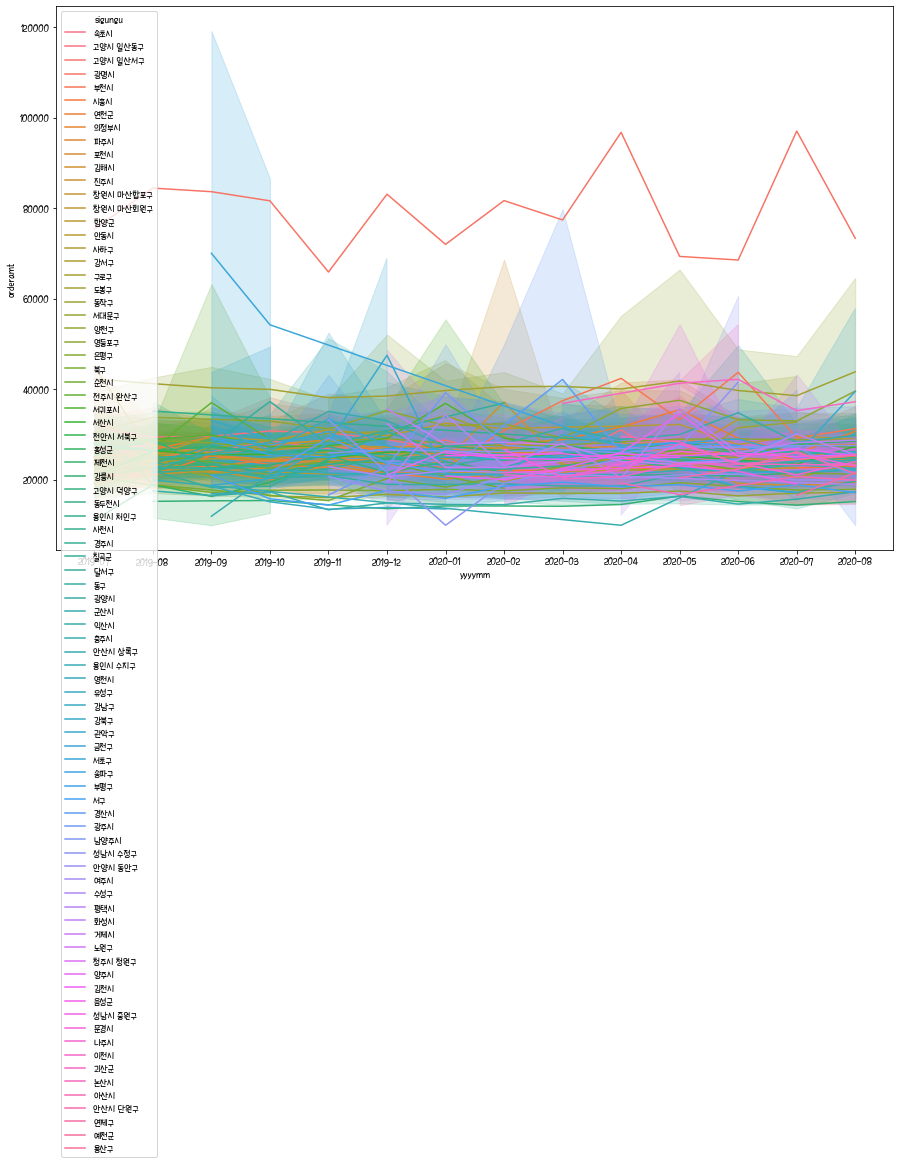

In [68]:
# 월 상품별 지역 단가 
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/PyStexam/data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# missingArea['yyyymm'] =  missingArea.date.str[0:7]
# del missingArea['date']
missingArea = missingArea.groupby(['yyyymm', 'sigu', 'sigungu', 'product']).mean('orderamt')
display(missingArea)

plt.figure(figsize=(15, 10))
sns.lineplot(x="yyyymm", y="orderamt", hue="sigungu", data=missingArea)
plt.show()

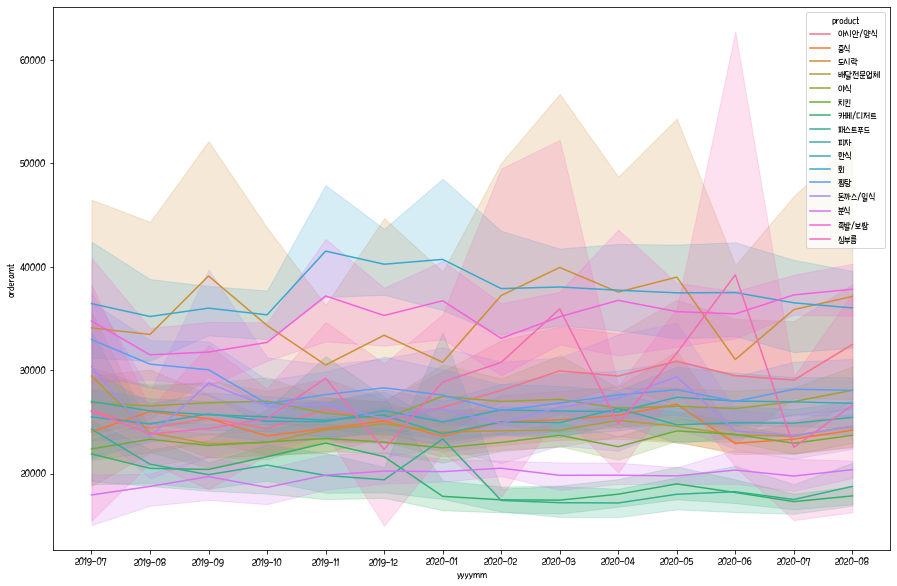

In [69]:
plt.figure(figsize=(15, 10))
sns.lineplot(x="yyyymm", y="orderamt", hue="product", data=missingArea)
plt.show()

In [6]:
OrderInner_df = pd.merge(OrderCnt , OrderAmt, how='inner', on=['date', 'product', 'sigu', 'sigungu'])
print(OrderInner_df.count())
# 197192
OrderInner_df.head(2)

date        191306
product     191306
sigu        191306
sigungu     191306
ordercnt    191306
orderamt    191306
dtype: int64


,date,product,sigu,sigungu,ordercnt,orderamt
0,2019-07-18,도시락,경기도,고양시 일산동구,35,35909
1,2019-07-18,도시락,경기도,고양시 일산서구,19,29513


In [18]:
missingdt = OrderInner_df[OrderInner_df['date'].isna()]
display(missingdt)

missingdt = OrderInner_df[OrderInner_df['product'].isna()]
display(missingdt)

missingdt = OrderInner_df[OrderInner_df['sigu'].isna()]
display(missingdt)

missingdt = OrderInner_df[OrderInner_df['sigungu'].isna()]
display(missingdt)

missingdt = OrderInner_df[OrderInner_df['ordercnt'].isna()]
display(missingdt)

missingdt = OrderInner_df[OrderInner_df['orderamt'].isna()]
display(missingdt)


,date,product,sigu,sigungu,ordercnt,orderamt


,date,product,sigu,sigungu,ordercnt,orderamt


,date,product,sigu,sigungu,ordercnt,orderamt


,date,product,sigu,sigungu,ordercnt,orderamt


,date,product,sigu,sigungu,ordercnt,orderamt


,date,product,sigu,sigungu,ordercnt,orderamt


In [19]:
OrderInner_df.to_csv("./DeliveryOrder.csv", index = False)

In [21]:
DeliveryTimeOrder = pd.read_csv("data/시간-지역별배달주문건수.csv", header=None)
DeliveryTimeOrder.columns = ["date", "time", "sigu", "sigungu", "ordercnt"]

In [24]:
missingdt = DeliveryTimeOrder[DeliveryTimeOrder['date'].isna()]
display(missingdt)

missingdt = DeliveryTimeOrder[DeliveryTimeOrder['time'].isna()]
display(missingdt)

missingdt = DeliveryTimeOrder[DeliveryTimeOrder['sigu'].isna()]
display(missingdt)

missingdt = DeliveryTimeOrder[DeliveryTimeOrder['sigungu'].isna()]
display(missingdt)

missingdt = DeliveryTimeOrder[DeliveryTimeOrder['ordercnt'].isna()]
display(missingdt)


,date,time,sigu,sigungu,ordercnt


,date,time,sigu,sigungu,ordercnt


,date,time,sigu,sigungu,ordercnt


,date,time,sigu,sigungu,ordercnt


,date,time,sigu,sigungu,ordercnt


In [25]:
DeliveryTimeOrder.to_csv("./DeliveryTimeOrder.csv", index = False)